In [2]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import math
from heapq import merge
from random import *
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [208]:
auto_df = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/auto_SCL/EMT_Autonomate_Output2.csv')
pt_df = []

In [209]:
r_col = []
r_num = auto_df.Run_file
pt = auto_df.Subject
for index, row in auto_df.iterrows():
    runs = r_num[index]
    run_num = runs[-1]
    r_col.append(run_num)

In [780]:
auto_df["run_num"] = r_col
pts_list = list(pt.unique())
pt_num = str(pts_list[34])
pt_num

IndexError: list index out of range

In [ ]:
pt_scl = auto_df.loc[auto_df["Subject"] == int(pt_num)]

cntxt_ls = pd.DataFrame(range(19))
cntxt_num = np.repeat(cntxt_ls.values, 6, axis=0)

runs_ls = pd.DataFrame(range(1,6,1))
r_num = np.repeat(runs_ls.values, 19, axis = 0)

c_multx = list(cntxt_num) * 5
pt_scl["cntxt_num"] = c_multx

pt_cntxt = []
for index, row in pt_scl.iterrows():
    p = str(pt_scl.cntxt_num[index])
    j = p.replace('[', '')
    q = j.replace(']', '')
    pt_cntxt.append(q)
    
pt_scl["cntxt_num"] = pt_cntxt
pt_scl

In [ ]:
last_hlf = pt_scl.loc[pt_scl["Half_Context"]==2]
#2.put this line of code categorizing by context #agg = tmp2.groupby('stims')['GSR'].agg(['count', 'mean']).reset_index()
r1 = last_hlf.loc[last_hlf["run_num"]=='1']
r2 = last_hlf.loc[last_hlf["run_num"]=='2']
r3 = last_hlf.loc[last_hlf["run_num"]=='3']
r4 = last_hlf.loc[last_hlf["run_num"]=='4']
r5 = last_hlf.loc[last_hlf["run_num"]=='5']

ragg1 = r1.groupby('cntxt_num', sort = False)['t2pValue'].agg(['count', 'mean']).round(4).reset_index()
ragg2 = r2.groupby('cntxt_num', sort = False)['t2pValue'].agg(['count', 'mean']).round(4).reset_index()
ragg3 = r3.groupby('cntxt_num', sort = False)['t2pValue'].agg(['count', 'mean']).round(4).reset_index()
ragg4 = r4.groupby('cntxt_num', sort = False)['t2pValue'].agg(['count', 'mean']).round(4).reset_index()
ragg5 = r5.groupby('cntxt_num', sort = False)['t2pValue'].agg(['count', 'mean']).round(4).reset_index()

cnsl_pt = pd.concat([ragg1, ragg2, ragg3, ragg4, ragg5])
cnsl_pt["pt"] = pt_num
cnsl_pt["r_num"] = r_num

In [ ]:
cnsl_pt

## match with encoding context

In [ ]:
encod_dirs = '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/new_batch/combined/'
encod_ext = [f for f in listdir(encod_dirs)]
for i in encod_ext:
    if i[-2:]== pt_num:
        pt_encod = encod_dirs + i

In [ ]:
encoding_files = []
pt_encod_files = [f for f in listdir(pt_encod)]
        
for a in pt_encod_files:
    if a[-4:] == '.csv' and 'encoding' in a:
        encoding_files.append(pt_encod + '/' + a)

In [ ]:
encod_dirs = '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/new_batch/combined/'
encod_ext = [f for f in listdir(encod_dirs)]
for i in encod_ext:
    if i[-2:]== pt_num:
        pt_encod = encod_dirs + i

In [ ]:
enc_ls = []
for file in encoding_files:
    #file_num = file [-29]
    #if (file_num == run_num):
    enc_file = pd.read_csv(file)
    enc_df = enc_file[["context_num", "context_type", "context_shock", "cntxt_trialnum"]]
    nona= enc_df.dropna()
    cln = nona.iloc[::6, :]
    butt = cln.reset_index()
    enc_ls.append(butt)
enc_pt = pd.concat(enc_ls)

In [ ]:
file

In [ ]:
enc_pt

## Merge!

In [ ]:
pt_mrgd = pd.concat([cnsl_pt, enc_pt], axis = 1)
pt_df.append(pt_mrgd)

In [3]:
all_pts = pd.concat(pt_df)
all_pts.to_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/auto_SCL/auto_allpts2.csv')

NameError: name 'pt_df' is not defined

## Summarize

In [4]:
sum_ptdf = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/auto_SCL/auto_allpts2.csv')
# throw out shock contexts entirely
mrgd_clnd = sum_ptdf[sum_ptdf.context_shock != 'shock-cntxt']
mrgd_clnd.to_csv("tst_mrgd_clnd.csv")

In [8]:
# slices mean and std by pt and by run
meu = mrgd_clnd.groupby(['pt', 'r_num'], sort = False)['mean'].mean()
st = mrgd_clnd.groupby(['pt', 'r_num'], sort = False)['mean'].std()
meu,st

(pt  r_num
 63  1        0.000450
     2        0.000000
     3        0.000761
     4        0.000311
     5        0.000000
                ...   
 52  1        0.000622
     2        0.000311
     3        0.000000
     4        0.001244
     5        0.001183
 Name: mean, Length: 165, dtype: float64,
 pt  r_num
 63  1        0.001909
     2        0.000000
     3        0.003229
     4        0.001320
     5        0.000000
                ...   
 52  1        0.001883
     2        0.001320
     3        0.000000
     4        0.004462
     5        0.002760
 Name: mean, Length: 165, dtype: float64)

In [9]:
mult_meu = pd.DataFrame(np.repeat(meu.values, 18, axis = 0))
mult_st = pd.DataFrame(np.repeat(st.values, 18, axis = 0))
mnd = pd.concat([mult_meu, mult_st], axis = 1)
mnd.columns = ["Mean","STD"]
mnd.to_csv("tst_mnd2.csv")

In [10]:
mrgd_clnd.head()
len(mrgd_clnd.pt.unique())

33

### manually merge mrgd_clnd and mean/std csvs!

In [11]:
## the new csv that comes out:
mrgd = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/auto_SCL/mrgd3.csv')
fc = mrgd.groupby(['pt', 'r_num','context_type'])['zs'].mean().unstack()
fc.to_csv("moment_oftruth.csv")

In [12]:
rd = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/auto_SCL/moment_oftruth3.csv')
rn1 = rd.loc[(rd['r_num'] == 1)]
rn2 = rd.loc[(rd['r_num'] == 2)]
rn3 = rd.loc[(rd['r_num'] == 3)]
rn4 = rd.loc[(rd['r_num'] == 4)]
rn5 = rd.loc[(rd['r_num'] == 5)]

rn1.to_csv("rn1.csv")
rn2.to_csv("rn2.csv")
rn3.to_csv("rn3.csv")
rn4.to_csv("rn4.csv")
rn5.to_csv("rn5.csv")

## graph

In [13]:
data_sub = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/auto_SCL/all_rns3.csv')

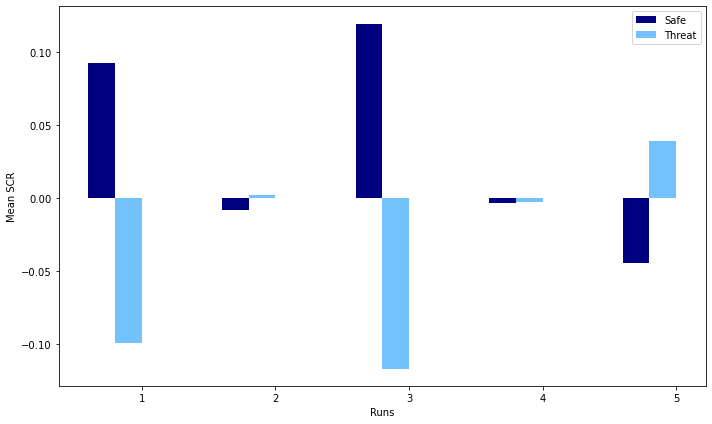

In [26]:
x_labels = ['1','2','3','4','5']
length = len(x_labels)
y_safe = [np.mean(data_sub.SAFE1), np.mean(data_sub.SAFE2), np.mean(data_sub.SAFE3), np.mean(data_sub.SAFE4), np.mean(data_sub.SAFE5)]
y_threat = [np.mean(data_sub.THREAT1), np.mean(data_sub.THREAT2), np.mean(data_sub.THREAT3), np.mean(data_sub.THREAT4), np.mean(data_sub.THREAT5)]
# Set plot parameters
fig, ax = plt.subplots(figsize=(10,6))
width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, y_safe, width, color='#000080', label='Safe')
ax.bar(x + width, y_threat, width, color='#73C2FB', label='Threat')


ax.set_ylabel('Mean SCR')
#ax.set_ylim(0,17)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Runs')
#ax.set_title('Title')
#ax.legend()
#plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
#ax.legend()